# Sobre Fourier
Fourier discreto y Fast Fourier

De la sección anterior, aprendimos cómo podemos caracterizar fácilmente una onda con período/frecuencia, amplitud, fase. Pero estos son fáciles para señales periódicas simples, como ondas sinusoidales o cosenoidales. Para ondas complicadas, no es fácil caracterizar así. Por ejemplo, las siguientes son ondas relativamente más complicadas, y es difícil decir cuál es la frecuencia, la amplitud de la onda, ¿verdad?

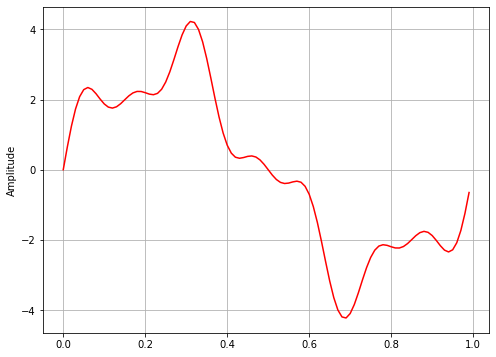

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.grid()
plt.ylabel('Amplitude')

plt.show()

Hay casos más complicados en el mundo real, sería genial si tuviéramos un método que podamos usar para analizar las características de la onda. Para ello se puede utilizar la Transformada de Fourier, **que descompone cualquier señal en una suma de ondas seno y coseno simples cuya frecuencia, amplitud y fase podemos medir fácilmente**. La transformada de Fourier se puede aplicar a ondas continuas o discretas, solo hablaremos de la Transformada Discreta de Fourier (DFT).

Usando la DFT, podemos componer la señal anterior a una serie de sinusoides y cada uno de ellos tendrá una frecuencia diferente. La siguiente figura 3D muestra la idea detrás de la DFT, que la señal anterior es en realidad el resultado de la suma de 3 ondas sinusoidales diferentes. La señal en el dominio del tiempo, que es la señal anterior que vimos, se puede transformar en una figura en el dominio de la frecuencia llamada espectro de amplitud DFT, donde las frecuencias de la señal se muestran como barras verticales. La altura de la barra después de la normalización es la amplitud de la señal en el dominio del tiempo. Puede ver que las 3 barras verticales corresponden a las 3 frecuencias de la onda sinusoidal, que también se representan en la figura.

<img src="images/tiempo_frecuencia.png" width="300" height="340">

### Transformada Discreta de Fourier

La DFT puede transformar una secuencia de señales espaciadas uniformemente en información sobre la frecuencia de todas las ondas sinusoidales que necesitaban sumarse a la señal en el dominio del tiempo. se define como

$X_k = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}} = \sum_{n=0}^{N-1}{x_n[cos(2\pi{kn/N}) -i\cdot sin(2\pi{kn/N})]}$

Donde
* N: numero de muestras
* n: muestra actual
* k: frecuencia actual donde k pertenece [0, N-1]
* $x_n$ : el sin de una muestra n
* $X_k$: la DFT la cual incluye información de la amplitud y fase

Además, la última expresión de la ecuación anterior deriva de la *fórmula de Euler*, que vincula las funciones trigonométricas a la función exponencial compleja: $e^{i\cdot x} = cosx+i\cdot sinx$

Debido a la naturaleza de la transformación, $X_0 = \sum_{n=0}^{N-1}x_n$. Si $N$ es un número impar, los elementos $X_1, X_2, ..., X_{(N-1)/2}$ contienen los términos de frecuencia positivos y los elementos $X_{(N+1)/2} , ..., X_{N-1}$ contienen los términos de frecuencia negativa, en orden decreciente de frecuencia negativa. Mientras que si $N$ es par, los elementos $X_1, X_2, ..., X_{N/2-1}$ contienen los términos de frecuencia positivos, y los elementos $X_{N/2},...,X_ {N-1}$ contienen los términos de frecuencia negativa, en orden decreciente de frecuencia negativa. En el caso de que nuestra señal de entrada $x$ sea una secuencia de valor real, la salida DFT $X_n$ para frecuencias positivas es el conjugado de los valores $X_n$ para frecuencias negativas, el espectro será simétrico. Por lo tanto, generalmente solo representamos la DFT correspondiente a las frecuencias positivas.

Las amplitudes devueltas por DFT son iguales a las amplitudes de las señales alimentadas en DFT si lo normalizamos por el número de puntos de muestra. Tenga en cuenta que al hacer esto dividirá la potencia entre los lados positivo y negativo, si la señal de entrada es una secuencia de valor real como describimos anteriormente, el espectro de las frecuencias positivas y negativas será simétrico, por lo tanto, solo miraremos un lado. del resultado DFT, y en lugar de dividir N, dividimos N/2 para obtener la amplitud correspondiente a la señal en el dominio del tiempo.

Escriba una función DFT(x) que tome un argumento, x - señal de entrada de 1 dimensión de valor real. La función calculará el DFT de la señal y devolverá los valores de DFT. Aplique esta función a la señal que generamos arriba y grafique el resultado.

In [15]:
def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

Aplicamos la función

C:\Users\LGDR\AppData\Local\Temp\ipykernel_1224\1436318460.py:10: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq, abs(X), 'b', \


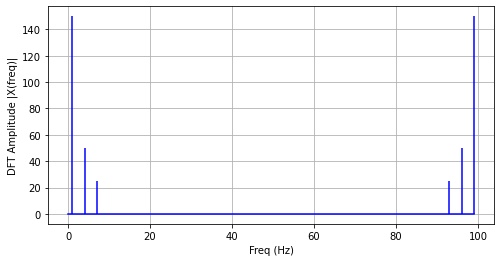

In [16]:
X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 4))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.grid()
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

Podemos ver desde aquí que la salida de la DFT es simétrica a la mitad de la frecuencia de muestreo (puede probar diferentes frecuencias de muestreo para probar). Esta mitad de la tasa de muestreo se llama frecuencia de Nyquist o frecuencia de plegado, lleva el nombre del ingeniero electrónico Harry Nyquist. Él y Claude Shannon tienen el teorema de muestreo de Nyquist-Shannon, que establece que una señal muestreada a una frecuencia puede reconstruirse completamente si contiene solo componentes de frecuencia por debajo de la mitad de esa frecuencia de muestreo, por lo que la salida de frecuencia más alta de la DFT es la mitad de la frecuencia de muestreo.

### Transformada Rápida de Fourier (FFT)

La Transformada Rápida de Fourier (FFT) es un algoritmo eficiente para calcular la DFT de una secuencia. Se describe por primera vez en el artículo clásico de Cooley y Tukey en 1965, pero la idea en realidad se remonta al trabajo inédito de Gauss en 1805. Es un algoritmo de divide y vencerás que divide recursivamente la DFT en DFT más pequeñas para reducir el cálculo. Como resultado, reduce con éxito la complejidad de la DFT de O(n2) a O(nlogn), donde n es el tamaño de los datos. Esta reducción en el tiempo de cálculo es significativa especialmente para datos con N grande, por lo tanto, hace que FFT se use ampliamente en ingeniería, ciencias y matemáticas. 

### FFT en Numpy

EJEMPLO: use la función fft e ifft de numpy para calcular el espectro de amplitud de FFT y FFT inversa para obtener la señal original. Grafique ambos resultados. Cronometre la función fft usando esta señal de 2000 longitudes.

C:\Users\LGDR\AppData\Local\Temp\ipykernel_1224\3054433410.py:12: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq, np.abs(X), 'b', \
C:\Users\LGDR\anaconda3\envs\nuevas_herramientas\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


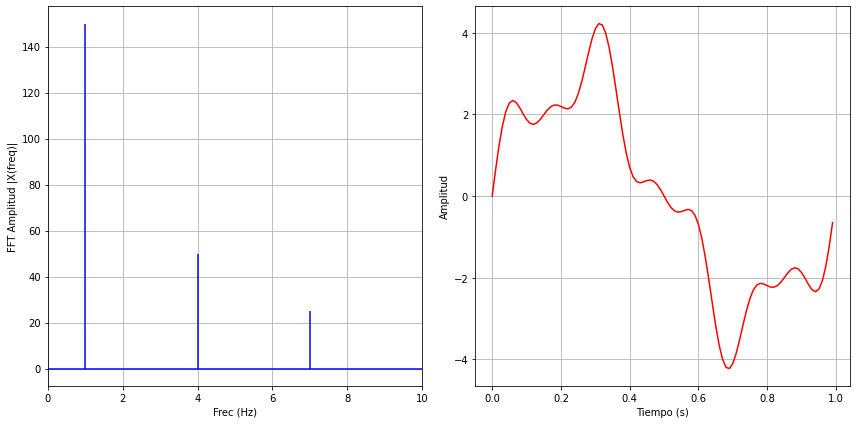

In [17]:
from numpy.fft import fft, ifft

X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Frec (Hz)')
plt.grid()
plt.ylabel('FFT Amplitud |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Tiempo (s)')
plt.grid()
plt.ylabel('Amplitud')
plt.tight_layout()
plt.show()